In [0]:
import csv
import nltk
import nltk
import pandas as pd
import numpy as np
import num2words
from num2words import num2words
#nltk.download()

In [0]:
#pip install glove_python

In [2]:
#pip install num2words

     |████████████████████████████████| 102kB 3.5MB/s 


In [0]:
##-------- Importing Files

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [8]:
#Importing Data

UIC=open('/content/drive/My Drive/Colab Notebooks/Adv_Text/UIC.txt',encoding="utf8").read()
ESPN=open('/content/drive/My Drive/Colab Notebooks/Adv_Text/ESPN_doc_file.txt',encoding="utf8").read()
NYTM=open('/content/drive/My Drive/Colab Notebooks/Adv_Text/New_York_Times_doc.txt',encoding="utf8").read()

# Checking Files

print(UIC[0:10])
print(ESPN[0:10])
print(NYTM[0:10])


Thank you
SAN FRANCI
DURHAM, N.


In [9]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
ps=PorterStemmer()

from nltk.corpus import stopwords
import string
from nltk.corpus import stopwords
stp_wrd=set(stopwords.words('english'))

In [0]:
def SentTokenize(data):
    return(sent_tokenize(data))

def Clean_Pos_Tags(data):
    postagged=list()
    l1=list()
    cleanword=list()
    for i in data:
        word=word_tokenize(i)
        cleanword=list()  
        for w in word:
            if(w.isnumeric()):
                cleanword.append(num2words(w))
            elif(w.isalpha()):
                cleanword.append(w.lower())
        l1.append(cleanword)
    
    for k in l1:
        tagged=list()
        tagged = nltk.pos_tag(k)
        postagged.append(tagged)
    
    return(postagged)

def POSFreq(data):
    d1=dict()
    postaglist=list()
    for i in data:
        for j in i:
            postaglist.append((j[1]))
    uniquetags=np.unique(postaglist)
    
    for i in uniquetags:
        count=0
        for j in postaglist:
            if i==j:
                count=count+1
        #print(i,count)
        d1[i]=count
    return(d1)

def JaccardSimilarity(d1,d2):
    num=list()
    den=list()
    for key in d1:
        for key1 in d2:
            intersection=0
            if(key==key1):
                intersection=min(d1[key],d2[key1])
                num.append(intersection)
                den.append(d1[key]+d2[key1]-intersection)
    return(np.sum(num)/np.sum(den))

In [0]:
UICDict=POSFreq(Clean_Pos_Tags(SentTokenize(UIC)))
ESPNDict=POSFreq(Clean_Pos_Tags(SentTokenize(ESPN)))
NYTMDict=POSFreq(Clean_Pos_Tags(SentTokenize(NYTM)))

In [13]:
print("Jaccardian Sim. Between UIC and ESPN-->>>",JaccardSimilarity(UICDict,ESPNDict))
print("Jaccardian Sim. Between UIC and Newyork Times-->>>",JaccardSimilarity(UICDict,NYTMDict))

Jaccardian Sim. Between UIC and ESPN-->>> 0.2279000372995151
Jaccardian Sim. Between UIC and Newyork Times-->>> 0.2612244897959184


In [0]:
#--------------Word Embedding and Visualization-------------->>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [0]:
UIC_Task2=open('/content/drive/My Drive/Colab Notebooks/Adv_Text/UIC.txt',encoding="utf8").read()
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [0]:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):
  if treebank_tag.startswith('J'):
    return wordnet.ADJ
  elif treebank_tag.startswith('V'):
    return wordnet.VERB
  elif treebank_tag.startswith('N'):
    return wordnet.NOUN
  elif treebank_tag.startswith('R'):
    return wordnet.ADV
  else:
    # As default pos in lemmatization is Noun
    return wordnet.NOUN

def Clean_Pos_Tags_Task2(data):
    postagged=list()
    l1=list()
    cleanword=list()
    for i in data:
        word=word_tokenize(i)
        cleanword=list()  
        for w in word:
            if(w.isalpha()):
                cleanword.append(w.lower())
        l1.append(cleanword)
    
    for k in l1:
        tagged=list()
        tagged = nltk.pos_tag(k)
        postagged.append(tagged)
    
    return(postagged)


def LemmaWithPosTags(data):
  l2=list()
  l1=list()
  for i in list(range(0,len(data))):
    d1=data[i]
    
    l1=list()
    #print(x)
    for j in list(range(0,len(d1))):
        #print(d1[j][])
        l1.append(lemmatizer.lemmatize(d1[j][0],get_wordnet_pos(d1[j][1])))
    l2.append(l1)
  return(l2)

def tounique(data):
  unique_words=list()
  for i in data:
    for j in i:
      unique_words.append(j)
  
  unique_words=pd.Series(unique_words).drop_duplicates().tolist()
  return(unique_words)

def RemStopPostPos(data):
  cleanword=list()
  l1=list()
  for i in data:
    cleanword=list()
    for j in i:
      if(j[0] not in stp_wrd):
        cleanword.append(j)
    l1.append(cleanword)
  return(l1)

In [21]:
LemmaInp=Clean_Pos_Tags_Task2(SentTokenize(UIC))
LemmatizedWords=LemmaWithPosTags(RemStopPostPos(LemmaInp))
print((LemmatizedWords[:2]))

[['thank'], ['contribution', 'receive', 'community', 'reader', 'editor', 'donor', 'keep', 'u', 'strong']]


In [0]:
#---- Getting Unique Words--------->>>>>>>>>.
unique_words=tounique(LemmatizedWords)

In [0]:
#--------Building Glove model------>>>>>>>>>

In [26]:
#pip install glove_python

     |████████████████████████████████| 266kB 4.7MB/s 
  Created wheel for glove-python: filename=glove_python-0.1.0-cp36-cp36m-linux_x86_64.whl size=700302 sha256=f1aac0b9ca1a3aaa38552229214051578a3109e159328a17dbcd9d266c7054d2
  Stored in directory: /root/.cache/pip/wheels/88/4b/6d/10c0d2ad32c9d9d68beec9694a6f0b6e83ab1662a90a089a4b
Successfully built glove-python


In [0]:
from glove import Corpus, Glove

# Defining a Corpus Object
corpus = Corpus()
corpus.fit(LemmatizedWords, window=20)
glove = Glove(no_components=len(LemmatizedWords), learning_rate=0.05)

glove.fit(corpus.matrix, epochs=128, no_threads=4)
glove.add_dictionary(corpus.dictionary)

In [28]:
#----- Validating the Glove Output--------->>>>>>>>>>>
glove.most_similar('chicago')

[('illinois', 0.9935657596841909),
 ('trace', 0.9896842163061531),
 ('people', 0.9877346109525751),
 ('location', 0.9837981315670856)]

In [0]:
N=len(tounique(LemmatizedWords))   ##-- Rows
M=len(LemmatizedWords) ## - Columns
data_matrix=np.zeros(shape=(N,M))
 
for i in range(0,N):
  word=unique_words[i]
  for j in range(0,M):
    data_matrix[i][j]=glove.word_vectors[glove.dictionary[word]][j]

In [0]:
#------------Visualization------------>>>>>>>>>>>>>

In [0]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [0]:
PCAModel=PCA(n_components=2)
DataMatr=PCAModel.fit_transform(data_matrix)

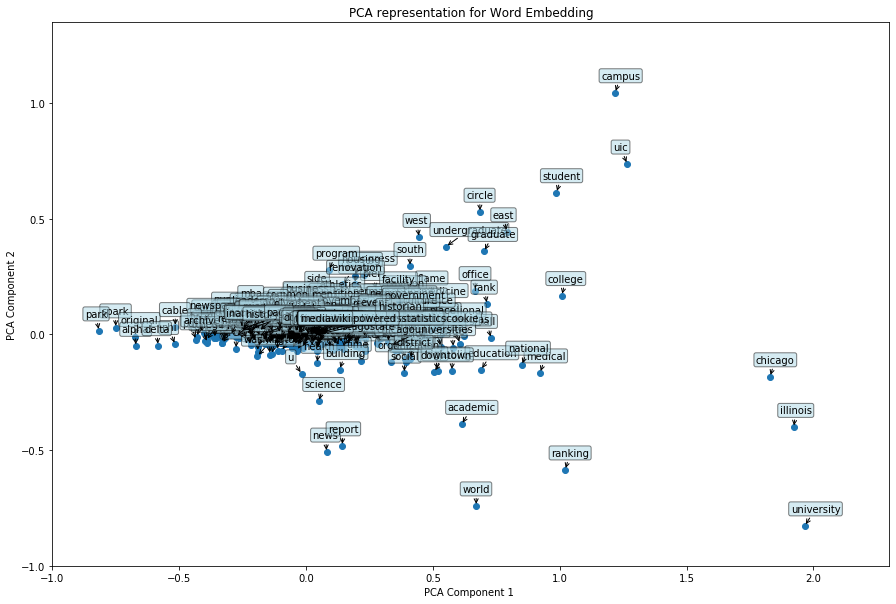

In [70]:
import warnings
warnings.filterwarnings("ignore")

plt.scatter(DataMatr[:,0],DataMatr[:,1],cmap=plt.get_cmap('Spectral'))
for label,x,y in zip(unique_words,DataMatr[:,0],DataMatr[:,1]):
    plt.annotate(
        label,
        xy=(x,y),
        xytext=(-14, 14),
        textcoords='offset points',
        bbox=dict(boxstyle='round,pad=0.2', fc='lightblue', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )
plt.xlabel('PCA Component 1 ')
plt.ylabel('PCA Component 2')
plt.title('PCA representation for Word Embedding')
plt.xlim(-1,2.3)
plt.ylim(-1,1.35)
plt.show()

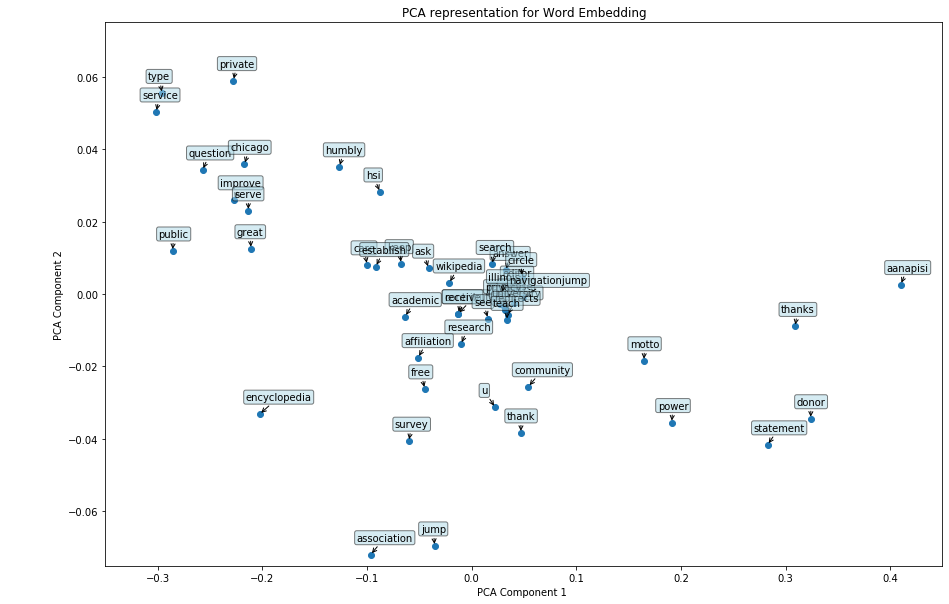

In [85]:
# generate random integer values
from random import seed
from random import randint
# seed random number generator
seed(21)
numlist=list()
# generate some integers
for _ in range(50):
  value = randint(0, 1120)
  numlist.append(value)
#print(len(numlist))


## Randomly printing top 50 words

plt.scatter(DataMatr[numlist,0],DataMatr[numlist,1],cmap=plt.get_cmap('Spectral'))
for label,x,y in zip(unique_words,DataMatr[numlist,0],DataMatr[numlist,1]):
    plt.annotate(
        label,
        xy=(x,y),
        xytext=(-14, 14),
        textcoords='offset points',
        bbox=dict(boxstyle='round,pad=0.2', fc='lightblue', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )
plt.xlabel('PCA Component 1 ')
plt.ylabel('PCA Component 2')
plt.title('PCA representation for Word Embedding')
plt.xlim(-0.35,0.45)
plt.ylim(-.075,.075)
plt.show()